# Contributors
Zijian Zhang 14851598 $\\$
Amish Sewlal 13297503 $\\$
Ravi Sharma Kaushik 14332744

# Imports

In [9]:
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from Mandelbrot import *
from MonteCarloIntegration import *

# Creating Mandlebrot Set

# Area of Mandlebrot Set using Monte Carlo Method

# Convergence study for various number of iterations

In [2]:
# Parameters
low = -2
high = 2
samples = 100**2
N = 100  # Number of simulations
iterations = np.arange(10, 500, 5)

# Simulating
results = []
for i in iterations:
    area = []
    for _ in range(N):
        A = randomSampling(low, high, i, samples)
        area.append(A)
    
    # Compute mean and standard deviation
    A_mean = np.mean(area)
    A_std = np.std(area, ddof=1)
    
    # Add to results
    results.append([A_mean, A_std])

# Convert to numpy array
results = np.array(results)

10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495


Text(0, 0.5, '$|A_{j,s} - A_{i,s}|$')

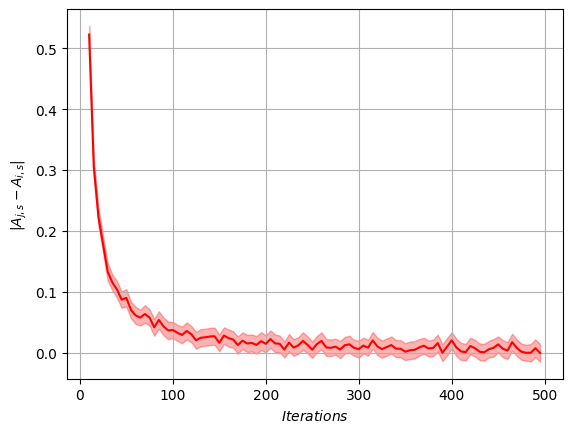

In [3]:
# Get mean and 95% confidence interval
A = results[:, 0]
A_err = results[:, 1]

# Get difference
dA = abs(A[-1] - A)
dA_err = (A_err[-1]**2  + A_err**2)**0.5 * 1.96 / np.sqrt(N)

# Left and right limit for confidence interval
left = dA - dA_err
right = dA + dA_err
left[left < 0] = 0

# Plotting
plt.plot(iterations, dA, color='red')

# Adding shaded area to show standard deviation
plt.fill_between(iterations, dA - dA_err, dA + dA_err, color='red', alpha=0.3)

# Setting for plot
plt.grid()
plt.xlabel('$Iterations$')
plt.ylabel('$|A_{j,s} - A_{i,s}|$')

# Convergence study for various number of samples

In [4]:
# Parameters
low = -2
high = 2
iterations = 200
samples = np.arange(5, 100, 2) ** 2
N = 100  # Number of simulations

# Simulating
results = []
for sample in samples:
    area = []
    for _ in range(N):
        A = randomSampling(low, high, iterations, sample)
        area.append(A)

    # Compute mean and standard deviation
    A_mean = np.mean(area)
    A_std = np.std(area, ddof=1)

    # Add to results
    results.append([A_mean, A_std])

# Convert to numpy array
results = np.array(results)

Text(0, 0.5, '$|A_{j,s} - A_{i,s}|$')

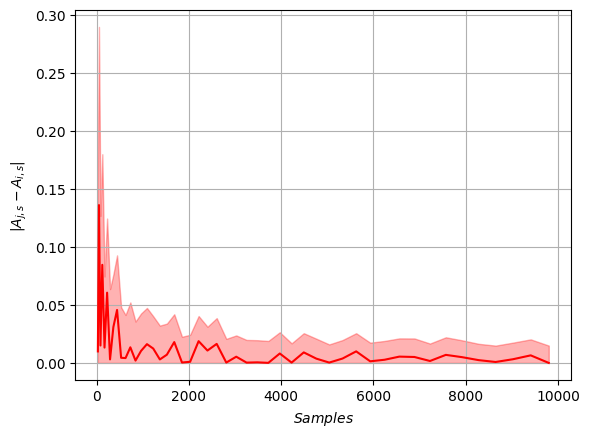

In [5]:
# Get mean and 95% confidence interval
A = results[:, 0]
A_err = results[:, 1]

# Get difference
dA = abs(A[-1] - A)
dA_err = (A_err[-1]**2  + A_err**2)**0.5 * 1.96 / np.sqrt(N)

# Left and right limit for confidence interval
left = dA - dA_err
right = dA + dA_err
left[left < 0] = 0

# Plotting
plt.plot(samples, dA, color='red')

# Adding shaded area to show standard deviation
plt.fill_between(samples, left, right, color='red', alpha=0.3)

# Setting for plot
plt.grid()
plt.xlabel('$Samples$')
plt.ylabel('$|A_{j,s} - A_{i,s}|$')

# Using various sampling techniques  

In [6]:
low = -2
high = 2
iterations = 200
samples = 100**2
N = 100

# Array for storing results
res = [[], [], []]

for _ in range(N):
    # Random sampling
    A = randomSampling(low, high, iterations, samples)
    res[0].append(A)
    
    # Latin Hypercube sampling
    A = latinHypercubeSampling(low, high, iterations, samples)
    res[1].append(A)
    
    # Orthogonal sampling
    A = orthogonalSampling(low, high, iterations, samples)
    res[2].append(A)



In [36]:
for i in range(3):
    A = np.mean(res[i])
    A_err = np.std(res[i], ddof=1) * 1.96 / np.sqrt(N)
    print(f'{A} +- {A_err}')

print('\nP-values:')
p01 = ttest_ind(res[0], res[1], equal_var=False).pvalue
p02 = ttest_ind(res[0], res[2], equal_var=False).pvalue

print(p01)
print(p02)

1.5309440000000003 +- 0.008623002988098262
1.5279040000000002 +- 0.0069595281358495005
1.532048 +- 0.007071199740013546

P-values:
0.5914097957050376
0.846352186377169


# Approach for improving convergence